In [2]:
!pip install python-levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.5 MB/s eta 0:00:00:00:01


In [3]:
import Levenshtein as lev
import pytesseract
import os
from PIL import Image

In [4]:
## From the error messaage, we can see that pytesessaract is installed in the directory called '/usr/share/tesseract-ocr'
# it is trying to search for the language file in the following directory
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

## we need to add the bengali.tranerdata in this directory

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata']


In [5]:
## this block of code is taken from (https://realpython.com/working-with-files-in-python/) tutorial

import shutil
src = '/kaggle/input/ocr-bangla/OCR_Bangla/Bengali.traineddata/Bengali.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames) # check that the file is added in this directory which was not present before.

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata', 'Bengali.traineddata']


In [6]:
image_file = "/kaggle/input/ocr-bangla/OCR_Bangla/Bangla Text Detection and Recognition/Image Folder/Adar_Kora_Alo_Page161_to_Page176/Adar_Kora_Alo_Page161_to_Page176_Page_01.jpg"
image = Image.open(image_file)
text = pytesseract.image_to_string(image, lang='Bengali')
print(text)

 

আমার হাতে এই মুহূর্তে যে কাগজটি আছে খাঁটি বাংলায় তার নাম
তালাকপত্ৰ ।

বুয়ার ভাষায় ডাইফুস লেটার ।

আপনি যহন ব্যাডরুমে ঘৃমে ছিলেন, তখন একটা লুক আইস্যা এই
প্যাপারডা দিয়া গ্যালো ।

ময়মনিসংহের মানুষ বাংলা সাহিত্যের বিশাল একটা অংশজুড়ে
দখলদারিত্ব রাখলেও উচ্চারণে বেদখল নিজের মতো । ও-কারকে ্রস্য
উকার আর এ-কারকে য-ফালা বলতে সামান্য দ্বিধাবোধ করে না তারা ।
নতুন নিয়োগ দেয়া আমাদের এই ঠিকা বুয়ার বাড়িও ঢাকায় অবস্থানকারী
শতকরা আশিভাগ বুয়ার ময়মনসিংহ ।

নিয়োগের কারণ নবীনার সদ্য শুরু হওয়া চাকরির ব্যস্ততা এবং ঘনঘন
ঢাকায় না থাকা । যথারীতি বাসার কাজের প্যাচ কম বুঝলেও, অন্য বুয়াদের
মতো সে অতি দ্ৰুত বুঝে ফেলেছে সংসারের গোপন প্যাচ ।

খামটা তোলামাত্রই প্রশ্ন করলো, ভাইয়া, কাগুজডা কী আপায় দিচ্ছে?

হ্যা, বুঝলে কী করে?

খামের উপরে কুড়িগ্রাম ল্যাহা আছিলো ।

নর্থবেঙ্গল কাজের লোকদের মতো ময়মনসিংহের বুয়ারা মূর্খ হয় না ।
সামান্য হলেও লেখাপড়া জানে । সকাল সকাল পত্রিকায় হেডলাইন দেখে
অনায়াসে বলে দিতে পারে, হরতাল কবে আছে ।

ভাইয়া, খারাফ কুনো খবর?

সেরকমই তো মনে হয় ।

আমি কাগজ খুললাম । সরকারি স্ট

In [7]:
gt_text = """আমার হাতে এই মুহূর্তে যে কাগজটি আছে খাঁটি বাংলায় তার নাম 
তালাকপত্র ।
বুয়ার ভাষায় ডাইফুস লেটার ।
আপনি যহন ব্যাডরুমে ঘুমে ছিলেন, তখন একটা লুক আইস্যা এই
প্যাপারডা দিয়া গ্যালো ।
ময়মনিসংহের মানুষ বাংলা সাহিত্যের বিশাল একটা অংশজুড়ে
দখলদারিত্ব রাখলেও উচ্চারণে বেদখল নিজের মতো। ও-কারকে হ্রস্য
উকার আর এ-কারকে য-ফালা বলতে সামান্য দ্বিধাবোধ করে না তারা ।
নতুন নিয়োগ দেয়া আমাদের এই ঠিকা বুয়ার বাড়িও ঢাকায় অবস্থানকারী
শতকরা আশিভাগ বুয়ার ময়মনসিংহ ।
নিয়োগের কারণ নবীনার সদ্য শুরু হওয়া চাকরির ব্যস্ততা এবং ঘনঘন
ঢাকায় না থাকা । যথারীতি বাসার কাজের প্যাচ কম বুঝলেও, অন্য বুয়াদের
মতো সে অতি দ্রুত বুঝে ফেলেছে সংসারের গোপন প্যাঁচ ।
খামটা তোলামাত্রই প্রশ্ন করলো, ভাইয়া, কাগুজডা কী আপায় দিচ্ছে?
বুঝলে কী করে ?
হ্যাঁ,
খামের উপরে কুড়িগ্রাম ল্যাহা আছিলো ।
নর্থবেঙ্গল কাজের লোকদের মতো ময়মনসিংহের বুয়ারা মূর্খ হয় না ।
সামান্য হলেও লেখাপড়া জানে । সকাল সকাল পত্রিকায় হেডলাইন দেখে
অনায়াসে বলে দিতে পারে, হরতাল করে আছে ।
ভাইয়া, খারাফ কুনো খবর?
সেরকমই তো মনে হয় ।
আমি কাগজ খুললাম। সরকারি স্ট্যাম্পের মতো নীল কাগজে ছাপা
কিছু দাপ্তরিক বক্তব্য ।
এইডা কী ভাইয়া কুটের প্যাপার?
কথা ঘুরালে আগ্রহ বাড়বে । এই শ্রেণির লোকদের এটাই স্বভাব ।
সুতরাং অতি
দ্রুত উত্তর দিলাম ।
মনে হয় তালাকনামা ।
১৬১"""

In [8]:
lev.distance(text, gt_text)

60

In [17]:
def calculate_wer(ground_truth, ocr_output):
    # Create a list of words for the ground truth and OCR output
    ground_truth_words = ground_truth.split()
    ocr_words = ocr_output.split()
    
    # Initialize counters
    S = 0   # Number of substitutions
    D = 0   # Number of deletions
    I = 0   # Number of insertions
    N = len(ground_truth_words)  # Number of words in the ground truth
    
    # Alignment
    for i, word in enumerate(ground_truth_words):
        if i < len(ocr_words):
            if word != ocr_words[i]:
                S += 1
        else:
            D += 1
    if len(ocr_words) > N:
        I = len(ocr_words) - N
    # Calculate the Word Error Rate (WER)
    wer = (S + D + I) / N
    
    return wer

def calculate_word_accuracy(average_wer):
    return 1 - average_wer

def calculate_cer(ground_truth, ocr_output):
    # Preprocess text
    ground_truth = ground_truth
    ocr_output = ocr_output

    # Initialize counters
    S = 0  # Substitutions
    I = 0  # Insertions
    D = 0  # Deletions
    N_gt = len(ground_truth)  # Total number of characters in ground truth

    # Alignment
    for i in range(max(len(ground_truth), len(ocr_output))):
        if i < len(ground_truth) and i < len(ocr_output):
            if ground_truth[i] != ocr_output[i]:
                S += 1
        elif i < len(ground_truth):
            D += 1
        else:
            I += 1

    # Calculate CER
    CER = (S + I + D) / N_gt

    return CER

def calculate_character_accuracy(average_cer):
    return 1 - average_cer

def calculate_levenstein_distance(ground_truth, ocr_output):
    import Levenshtein as lev
    
    distance = lev.distance(ground_truth, ocr_output)
    
    return distance

def calculate_precision_recall_f1(ground_truth, ocr_output):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(ocr_output)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1

In [10]:
ground_truth_text = 'this is the ground truth text'
ocr_output_text = 'this is the ground truth text'
wer = calculate_wer(ground_truth_text, ocr_output_text)
acr = calculate_word_accuracy(wer)
wer, acr

(0.0, 1.0)

In [11]:
wer = calculate_wer(text, gt_text)
wer

0.4504950495049505

In [12]:
acr_wer = calculate_word_accuracy(wer)
acr_wer

0.5495049504950495

In [13]:
cer = calculate_cer(text, gt_text)
cer

0.9546578730420445

In [14]:
acr_cer = calculate_character_accuracy(cer)
acr_cer

0.045342126957955475

In [18]:
calculate_precision_recall_f1(text, gt_text)

(1.0, 0.9333333333333333, 0.9655172413793104)

In [16]:
gt_text_file = "/kaggle/input/ocr-bangla/OCR_Bangla/Bangla Text Detection and Recognition/Word Folder/Adar_Kora_Alo_Page161_to_Page176/Adar_Kora_Alo_Page161_to_Page176_Page_01.txt"

with open(gt_text_file, 'r', encoding='utf-8') as f:
    gt_text = f.read()
    print(gt_text)

আমার হাতে এই মুহূর্তে যে কাগজটি আছে খাঁটি বাংলায় তার নাম 
তালাকপত্র ।
বুয়ার ভাষায় ডাইফুস লেটার ।
আপনি যহন ব্যাডরুমে ঘুমে ছিলেন, তখন একটা লুক আইস্যা এই
প্যাপারডা দিয়া গ্যালো ।
ময়মনিসংহের মানুষ বাংলা সাহিত্যের বিশাল একটা অংশজুড়ে
দখলদারিত্ব রাখলেও উচ্চারণে বেদখল নিজের মতো। ও-কারকে হ্রস্য
উকার আর এ-কারকে য-ফালা বলতে সামান্য দ্বিধাবোধ করে না তারা ।
নতুন নিয়োগ দেয়া আমাদের এই ঠিকা বুয়ার বাড়িও ঢাকায় অবস্থানকারী
শতকরা আশিভাগ বুয়ার ময়মনসিংহ ।
নিয়োগের কারণ নবীনার সদ্য শুরু হওয়া চাকরির ব্যস্ততা এবং ঘনঘন
ঢাকায় না থাকা । যথারীতি বাসার কাজের প্যাচ কম বুঝলেও, অন্য বুয়াদের
মতো সে অতি দ্রুত বুঝে ফেলেছে সংসারের গোপন প্যাঁচ ।
খামটা তোলামাত্রই প্রশ্ন করলো, ভাইয়া, কাগুজডা কী আপায় দিচ্ছে?
বুঝলে কী করে ?
হ্যাঁ,
খামের উপরে কুড়িগ্রাম ল্যাহা আছিলো ।
নর্থবেঙ্গল কাজের লোকদের মতো ময়মনসিংহের বুয়ারা মূর্খ হয় না ।
সামান্য হলেও লেখাপড়া জানে । সকাল সকাল পত্রিকায় হেডলাইন দেখে
অনায়াসে বলে দিতে পারে, হরতাল করে আছে ।
ভাইয়া, খারাফ কুনো খবর?
সেরকমই তো মনে হয় ।
আমি কাগজ খুললাম। সরকারি স্ট্যাম্পের মত

In [19]:
lev.distance(gt_text, text)

59

In [20]:
print(gt_text)
wer = calculate_wer(text, gt_text)
acr = calculate_word_accuracy(wer)
wer,acr

আমার হাতে এই মুহূর্তে যে কাগজটি আছে খাঁটি বাংলায় তার নাম 
তালাকপত্র ।
বুয়ার ভাষায় ডাইফুস লেটার ।
আপনি যহন ব্যাডরুমে ঘুমে ছিলেন, তখন একটা লুক আইস্যা এই
প্যাপারডা দিয়া গ্যালো ।
ময়মনিসংহের মানুষ বাংলা সাহিত্যের বিশাল একটা অংশজুড়ে
দখলদারিত্ব রাখলেও উচ্চারণে বেদখল নিজের মতো। ও-কারকে হ্রস্য
উকার আর এ-কারকে য-ফালা বলতে সামান্য দ্বিধাবোধ করে না তারা ।
নতুন নিয়োগ দেয়া আমাদের এই ঠিকা বুয়ার বাড়িও ঢাকায় অবস্থানকারী
শতকরা আশিভাগ বুয়ার ময়মনসিংহ ।
নিয়োগের কারণ নবীনার সদ্য শুরু হওয়া চাকরির ব্যস্ততা এবং ঘনঘন
ঢাকায় না থাকা । যথারীতি বাসার কাজের প্যাচ কম বুঝলেও, অন্য বুয়াদের
মতো সে অতি দ্রুত বুঝে ফেলেছে সংসারের গোপন প্যাঁচ ।
খামটা তোলামাত্রই প্রশ্ন করলো, ভাইয়া, কাগুজডা কী আপায় দিচ্ছে?
বুঝলে কী করে ?
হ্যাঁ,
খামের উপরে কুড়িগ্রাম ল্যাহা আছিলো ।
নর্থবেঙ্গল কাজের লোকদের মতো ময়মনসিংহের বুয়ারা মূর্খ হয় না ।
সামান্য হলেও লেখাপড়া জানে । সকাল সকাল পত্রিকায় হেডলাইন দেখে
অনায়াসে বলে দিতে পারে, হরতাল করে আছে ।
ভাইয়া, খারাফ কুনো খবর?
সেরকমই তো মনে হয় ।
আমি কাগজ খুললাম। সরকারি স্ট্যাম্পের মত

(0.4504950495049505, 0.5495049504950495)

In [21]:
print(text)

 

আমার হাতে এই মুহূর্তে যে কাগজটি আছে খাঁটি বাংলায় তার নাম
তালাকপত্ৰ ।

বুয়ার ভাষায় ডাইফুস লেটার ।

আপনি যহন ব্যাডরুমে ঘৃমে ছিলেন, তখন একটা লুক আইস্যা এই
প্যাপারডা দিয়া গ্যালো ।

ময়মনিসংহের মানুষ বাংলা সাহিত্যের বিশাল একটা অংশজুড়ে
দখলদারিত্ব রাখলেও উচ্চারণে বেদখল নিজের মতো । ও-কারকে ্রস্য
উকার আর এ-কারকে য-ফালা বলতে সামান্য দ্বিধাবোধ করে না তারা ।
নতুন নিয়োগ দেয়া আমাদের এই ঠিকা বুয়ার বাড়িও ঢাকায় অবস্থানকারী
শতকরা আশিভাগ বুয়ার ময়মনসিংহ ।

নিয়োগের কারণ নবীনার সদ্য শুরু হওয়া চাকরির ব্যস্ততা এবং ঘনঘন
ঢাকায় না থাকা । যথারীতি বাসার কাজের প্যাচ কম বুঝলেও, অন্য বুয়াদের
মতো সে অতি দ্ৰুত বুঝে ফেলেছে সংসারের গোপন প্যাচ ।

খামটা তোলামাত্রই প্রশ্ন করলো, ভাইয়া, কাগুজডা কী আপায় দিচ্ছে?

হ্যা, বুঝলে কী করে?

খামের উপরে কুড়িগ্রাম ল্যাহা আছিলো ।

নর্থবেঙ্গল কাজের লোকদের মতো ময়মনসিংহের বুয়ারা মূর্খ হয় না ।
সামান্য হলেও লেখাপড়া জানে । সকাল সকাল পত্রিকায় হেডলাইন দেখে
অনায়াসে বলে দিতে পারে, হরতাল কবে আছে ।

ভাইয়া, খারাফ কুনো খবর?

সেরকমই তো মনে হয় ।

আমি কাগজ খুললাম । সরকারি স্ট

Visualize

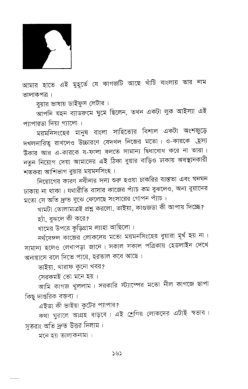

In [22]:
from matplotlib import pyplot as plt
from PIL import Image

image_path = "/kaggle/input/ocr-bangla/OCR_Bangla/Bangla Text Detection and Recognition/Image Folder/Adar_Kora_Alo_Page161_to_Page176/Adar_Kora_Alo_Page161_to_Page176_Page_01.jpg"
bangla_image = Image.open(image_path)

plt.imshow(bangla_image)
plt.axis('off')
plt.show()

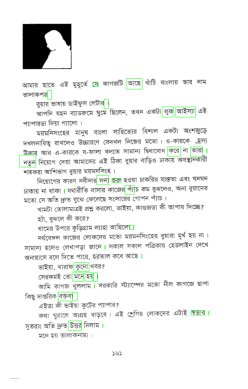

In [23]:
import cv2

bangla_image = cv2.imread(image_path)

# Convert the image to RGB (required for pytesseract)
bangla_image_rgb = cv2.cvtColor(bangla_image, cv2.COLOR_BGR2RGB)

# Use pytesseract to extract text and bounding boxes
custom_config = r'--oem 3 --psm 6'  # Customize pytesseract settings as needed
results = pytesseract.image_to_data(bangla_image_rgb, output_type=pytesseract.Output.DICT, config=custom_config)

# Draw bounding boxes on the image
for i in range(len(results['text'])):
    if int(results['conf'][i]) > 60:  # Confidence threshold to consider
        (x, y, w, h) = (results['left'][i], results['top'][i], results['width'][i], results['height'][i])
        cv2.rectangle(bangla_image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(bangla_image_rgb)
plt.axis('off')
plt.show()

Image saved as: processed_bangla_image.tiff


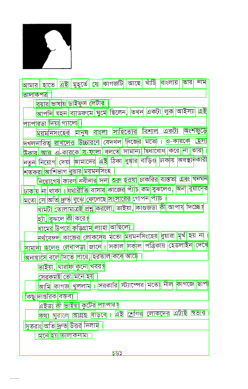

In [24]:
# Lower the confidence threshold
custom_config = r'--oem 3 --psm 6 --tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata -l ben --dpi 300'

# Draw bounding boxes on the image (without confidence thresholding)
for i in range(1, len(results['text'])):  # Start from 1 to skip header
    (x, y, w, h) = (results['left'][i], results['top'][i], results['width'][i], results['height'][i])
    cv2.rectangle(bangla_image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(bangla_image_rgb)
plt.axis('off')
# Save the image
output_image_path = 'processed_bangla_image.tiff'
plt.savefig(output_image_path,)

# Show the saved image path
print("Image saved as:", output_image_path)
plt.show()

In [25]:
# Save the image
output_image_path = 'processed_bangla_image.jpg'
plt.savefig(output_image_path,)

# Show the saved image path
print("Image saved as:", output_image_path)

Image saved as: processed_bangla_image.jpg


<Figure size 640x480 with 0 Axes>

# Pytesseract for multiple images

In [26]:
!pip install python-levenshtein

In [2]:
import Levenshtein as lev
import pytesseract
import os
from PIL import Image

In [3]:
## From the error messaage, we can see that pytesessaract is installed in the directory called '/usr/share/tesseract-ocr'
# it is trying to search for the language file in the following directory
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

## we need to add the bengali.tranerdata in this directory

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata']


In [4]:
## this block of code is taken from (https://realpython.com/working-with-files-in-python/) tutorial

import shutil
src = '/kaggle/input/ocr-bangla/OCR_Bangla/Bengali.traineddata/Bengali.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames) # check that the file is added in this directory which was not present before.

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata', 'Bengali.traineddata']


In [27]:
def calculate_wer(ground_truth, ocr_output):
    # Create a list of words for the ground truth and OCR output
    ground_truth_words = ground_truth.split()
    ocr_words = ocr_output.split()
    
    # Initialize counters
    S = 0   # Number of substitutions
    D = 0   # Number of deletions
    I = 0   # Number of insertions
    N = len(ground_truth_words)  # Number of words in the ground truth
    
    # Alignment
    for i, word in enumerate(ground_truth_words):
        if i < len(ocr_words):
            if word != ocr_words[i]:
                S += 1
        else:
            D += 1
    if len(ocr_words) > N:
        I = len(ocr_words) - N
    # Calculate the Word Error Rate (WER)
    wer = (S + D + I) / N
    
    return wer

def calculate_word_accuracy(average_wer):
    return 1 - average_wer


# def calculate_cer(ocr_output, ground_truth):
#     import Levenshtein as lev
    
#     ocr_output = ocr_output.strip()
#     ground_truth = ground_truth.strip()
    
#     substitutions = lev.distance(ocr_output, ground_truth)
#     deletions = lev.distance(ocr_output, ground_truth)
#     insertions = lev.distance(ocr_output, ground_truth)
    
#     total_errors = substitutions + deletions + insertions
#     total_characters = len(ground_truth)
    
#     cer = total_errors / total_characters
    
#     return cer

def calculate_cer(ground_truth, ocr_output):
    # Preprocess text
    ground_truth = ground_truth
    ocr_output = ocr_output

    # Initialize counters
    S = 0  # Substitutions
    I = 0  # Insertions
    D = 0  # Deletions
    N_gt = len(ground_truth)  # Total number of characters in ground truth

    # Alignment
    for i in range(max(len(ground_truth), len(ocr_output))):
        if i < len(ground_truth) and i < len(ocr_output):
            if ground_truth[i] != ocr_output[i]:
                S += 1
        elif i < len(ground_truth):
            D += 1
        else:
            I += 1

    # Calculate CER
    CER = (S + I + D) / N_gt

    return CER

def calculate_character_accuracy(average_cer):
    return 1 - average_cer

def calculate_levenstein_distance(ground_truth, ocr_output):
    import Levenshtein as lev
    
    distance = lev.distance(ground_truth, ocr_output)
    
    return distance

def calculate_precision_recall_f1(ground_truth, ocr_output):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(ocr_output)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1

In [28]:
!pip install jiwer
!pip install easyocr
!pip install opencv-contrib
!pip install torch torchvision torchaudio
!pip install python-Levenshtein

ERROR: Could not find a version that satisfies the requirement opencv-contrib (from versions: none)
ERROR: No matching distribution found for opencv-contrib


## Documents

In [29]:
import re
from jiwer import wer, cer
import os
import cv2,pytesseract
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)

# Function to calculate word level accuracy
def calculate_word_accuracy(average_wer):
    return 1 - average_wer

# Function to calculate character level accuracy
def calculate_character_accuracy(average_cer):
    return 1 - average_cer

# Precision-Recall-F1
def calculate_precision_recall_f1(ground_truth, ocr_output):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(ocr_output)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Document Images/Test Images"
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Document Images/Ground Truth Text"
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)



for image_file, word_file in zip(image_files, word_files):
    # Read image using OpenCV
    image = cv2.imread(os.path.join(image_folder, image_file))
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = pytesseract.image_to_string(image, lang='Bengali+English')  # Using Bengali and English
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    print(f'ocr_output: ', {ocr_output})

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\","/"), 'r',  encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'ground_truth_words: ', {ground_truth_words}) 
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
#     wer = calculate_wer(GTT_processed, DT_processed)
#     print(wer)
#     total_wer += wer
    wer_value = wer(GTT_processed, DT_processed)
    print(wer_value)
    total_wer += wer_value
    
    # Calculate CER
#     cer = calculate_cer(GTT_processed, DT_processed)
#     print(cer)
#     total_cer += cer
    cer_value = cer(GTT_processed, DT_processed)
    print(cer_value)
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(levenshtein_distance)
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(precision, recall, f1)
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_documents = pd.DataFrame(data)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate accuracy
word_level_accuracy = calculate_word_accuracy(average_wer)
print(f"Word-level Accuracy:", word_level_accuracy)
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Calculate accuracy
character_level_accuracy = calculate_character_accuracy(average_cer)
print(f"Character Level Accuracy: {character_level_accuracy}")
# Levenshtein distance
average_levenshtein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenshtein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")
average_inference_time = total_inference_time / total_images
print(f"Average inference time: {average_inference_time}")
avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average WLR": word_level_accuracy,
    "Average CER": average_cer,
    "Average CLR": character_level_accuracy,
    "Average Levenshtein Distace": average_levenshtein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
    "Average Inference Time": average_inference_time,
})

summary_df_documents = pd.DataFrame(avg_data)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (2).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg', 'Adar_Kora_Alo_Page161_to_Page176_Page_01.jpg', 'Adar_Kora_Alo_Page161_to_Page176_Page_02.jpg', 'Adar_Kora_Alo_Page161_to_Page176_Page_03.jpg', 'Aguner_Chamak_Page07_to_Page29_Page_01.jpg', 'Aguner_Chamak_Page07_to_Page29_Page_02.jpg', 'Aguner_Chamak_Page07_to_Page29_Page_03.jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (2).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt', 'Adar_Kora_Alo_Page161_to_Page176_Page_01.txt', 'Adar_Kora_Alo_Page161_to_Page176_Page_02.txt', 'Adar_Kora_Alo_Page161_to_Page176_Page_03.txt', 'Aguner_Chamak_Page07_to_Page29_Page_01.txt', 'Aguner_Chamak_Page07_to_Page29_Page_02.txt', 'Aguner_Chamak_Page07_to_Page29_Page_03.txt']
ocr_output:  {' \n\nনিজেদের অপকর্মের মাশুল গুণতে হবে এবং কেয

In [30]:
df_documents

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.211538,0.124242,0.788462,0.875758,41,0.936170,0.916667,0.926316,0.959106
1,1 (10).jpg,1 (10).txt,0.132841,0.074049,0.867159,0.925951,109,0.902778,0.970149,0.935252,4.181022
2,1 (11).jpg,1 (11).txt,0.175573,0.060991,0.824427,0.939009,48,0.859649,0.924528,0.890909,2.242089
3,1 (12).jpg,1 (12).txt,0.084795,0.016765,0.915205,0.983235,34,0.942857,0.956522,0.949640,4.280989
4,1 (13).jpg,1 (13).txt,0.077465,0.012620,0.922535,0.987380,29,0.911765,0.968750,0.939394,5.325558
5,1 (14).jpg,1 (14).txt,0.097222,0.020655,0.902778,0.979345,41,0.902778,0.955882,0.928571,4.922136
6,1 (2).jpg,1 (2).txt,0.190476,0.058696,0.809524,0.941304,108,0.931507,1.000000,0.964539,4.177662
7,1 (3).jpg,1 (3).txt,0.152941,0.085659,0.847059,0.914341,178,0.925373,0.953846,0.939394,4.010270
8,1 (4).jpg,1 (4).txt,0.079755,0.019854,0.920245,0.980146,19,0.962963,0.962963,0.962963,2.082329
9,1 (5).jpg,1 (5).txt,0.113636,0.094944,0.886364,0.905056,169,0.968750,1.000000,0.984127,4.389383


In [31]:
summary_df_documents

,Average WER,Average WLR,Average CER,Average CLR,Average Levenshtein Distace,Average Precision,Average Recall,Average F1,Average Inference Time
0,0.140529,0.859471,0.06315,0.93685,81.6,0.930991,0.968447,0.94899,3.450005


In [44]:
df_documents.to_csv("PyTesseract_BanglaCrossHair_Documents.csv")
summary_df_documents.to_csv("Summary_PyTesseract_BanglaCrossHair_Documents.csv")

## Clear Images

In [32]:
import re
from jiwer import wer, cer
import os
import cv2,pytesseract
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)

# Function to calculate word level accuracy
def calculate_word_accuracy(average_wer):
    return 1 - average_wer

# Function to calculate character level accuracy
def calculate_character_accuracy(average_cer):
    return 1 - average_cer

# Precision-Recall-F1
def calculate_precision_recall_f1(ground_truth, ocr_output):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(ocr_output)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1

image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Test Images"
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Ground Truth Text"
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)



for image_file, word_file in zip(image_files, word_files):
    # Read image using OpenCV
    image = cv2.imread(os.path.join(image_folder, image_file))
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = pytesseract.image_to_string(image, lang='Bengali+English')  # Using Bengali and English
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    print(f'ocr_output: ', {ocr_output})

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\","/"), 'r',  encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'ground_truth_words: ', {ground_truth_words}) 
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
#     wer = calculate_wer(GTT_processed, DT_processed)
#     print(wer)
#     total_wer += wer
    wer_value = wer(GTT_processed, DT_processed)
    print(wer_value)
    total_wer += wer_value
    
    # Calculate CER
#     cer = calculate_cer(GTT_processed, DT_processed)
#     print(cer)
#     total_cer += cer
    cer_value = cer(GTT_processed, DT_processed)
    print(cer_value)
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(levenshtein_distance)
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(precision, recall, f1)
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_clear_images = pd.DataFrame(data)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate accuracy
word_level_accuracy = calculate_word_accuracy(average_wer)
print(f"Word-level Accuracy:", word_level_accuracy)
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Calculate accuracy
character_level_accuracy = calculate_character_accuracy(average_cer)
print(f"Character Level Accuracy: {character_level_accuracy}")
# Levenshtein distance
average_levenshtein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenshtein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")
average_inference_time = total_inference_time / total_images
print(f"Average inference time: {average_inference_time}")
avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average WLR": word_level_accuracy,
    "Average CER": average_cer,
    "Average CLR": character_level_accuracy,
    "Average Levenshtein Distace": average_levenshtein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
    "Average Inference Time": average_inference_time,
})

summary_df_clear_images = pd.DataFrame(avg_data)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
ocr_output:  {'১ রুম, ১ বাথরুম, ১ কিচেন রুম\nযোগাযোগঃ ০৯৬৯৩-৯০৭৫৭৫\n০৯১৭৬২-২২৬৩৭০\n\nT92810? ; m2 THEN ©\n\n \n\x0c'}
ground_truth_words:  {'ডা দেওয়া হইবে । ,১ড্রয়িং, ১ডাইনিং রুম, ২বারান্দা নের গ্যাস ৭১২-৩১৯৮৬৫\nওয়া হই যোগঃ -৪৬৭ \nসী জায়গা বিক্রয় হইবে । চিস্ত ২৬/৮ সুবিদবাজার, সিলেট। পরিমান :- ৭ শতক মোবাইলঃ- 01711973258\nবাসা বাড়ীর যাবতীয় মালামাল পালটানো হয় । (ভেনগাড়ী) প্রয়োজনে ড্রাইভার, যোগাযোগ- 01889-944691 01920-063726\nফ্ল্যাট ভাড়া দেওয়া হইবে বেডরুম

In [33]:
df_clear_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.942149,0.912418,0.057851,0.087582,698,0.820513,0.347826,0.488550,6.406623
1,1 (10).jpg,1 (10).txt,0.791971,0.619019,0.208029,0.380981,1035,0.680851,0.810127,0.739884,7.149009
2,1 (11).jpg,1 (11).txt,0.633803,0.374601,0.366197,0.625399,469,0.705128,0.887097,0.785714,7.726832
3,1 (12).jpg,1 (12).txt,1.000000,1.000000,0.000000,0.000000,166,0.000000,0.000000,0.000000,4.843634
4,1 (13).jpg,1 (13).txt,1.000000,1.000000,0.000000,0.000000,170,0.000000,0.000000,0.000000,4.746578
5,1 (14).jpg,1 (14).txt,1.000000,1.000000,0.000000,0.000000,170,0.000000,0.000000,0.000000,4.914894
6,1 (15).jpg,1 (15).txt,0.952381,0.807692,0.047619,0.192308,147,0.695652,0.380952,0.492308,5.026132
7,1 (16).jpg,1 (16).txt,1.000000,1.000000,0.000000,0.000000,276,0.000000,0.000000,0.000000,4.255059
8,1 (17).jpg,1 (17).txt,1.000000,1.000000,0.000000,0.000000,182,0.000000,0.000000,0.000000,5.266146
9,1 (2).jpg,1 (2).txt,1.000000,1.000000,0.000000,0.000000,457,0.000000,0.000000,0.000000,4.170954


In [34]:
summary_df_clear_images

,Average WER,Average WLR,Average CER,Average CLR,Average Levenshtein Distace,Average Precision,Average Recall,Average F1,Average Inference Time
0,0.943729,0.056271,0.885928,0.114072,488.05,0.368302,0.252172,0.263796,5.811282


In [45]:
df_clear_images.to_csv("PyTesseract_BanglaCrossHair_clear_images.csv")
summary_df_clear_images.to_csv("Summary_PyTesseract_BanglaCrossHair_clear_images.csv")

## Blurred Images

In [35]:
import re
from jiwer import wer, cer
import os
import cv2,pytesseract
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)

# Function to calculate word level accuracy
def calculate_word_accuracy(average_wer):
    return 1 - average_wer

# Function to calculate character level accuracy
def calculate_character_accuracy(average_cer):
    return 1 - average_cer

# Precision-Recall-F1
def calculate_precision_recall_f1(ground_truth, ocr_output):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(ocr_output)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Blurred Images/Test Images"
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Blurred Images/Ground Truth Text"
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)



for image_file, word_file in zip(image_files, word_files):
    # Read image using OpenCV
    image = cv2.imread(os.path.join(image_folder, image_file))
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = pytesseract.image_to_string(image, lang='Bengali+English')  # Using Bengali and English
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    print(f'ocr_output: ', {ocr_output})

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\","/"), 'r',  encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'ground_truth_words: ', {ground_truth_words}) 
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
#     wer = calculate_wer(GTT_processed, DT_processed)
#     print(wer)
#     total_wer += wer
    wer_value = wer(GTT_processed, DT_processed)
    print(wer_value)
    total_wer += wer_value
    
    # Calculate CER
#     cer = calculate_cer(GTT_processed, DT_processed)
#     print(cer)
#     total_cer += cer
    cer_value = cer(GTT_processed, DT_processed)
    print(cer_value)
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(levenshtein_distance)
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(precision, recall, f1)
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_blurred_images = pd.DataFrame(data)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate accuracy
word_level_accuracy = calculate_word_accuracy(average_wer)
print(f"Word-level Accuracy:", word_level_accuracy)
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Calculate accuracy
character_level_accuracy = calculate_character_accuracy(average_cer)
print(f"Character Level Accuracy: {character_level_accuracy}")
# Levenshtein distance
average_levenshtein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenshtein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")
average_inference_time = total_inference_time / total_images
print(f"Average inference time: {average_inference_time}")
avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average WLR": word_level_accuracy,
    "Average CER": average_cer,
    "Average CLR": character_level_accuracy,
    "Average Levenshtein Distace": average_levenshtein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
    "Average Inference Time": average_inference_time,
})

summary_df_blurred_images = pd.DataFrame(avg_data)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
ocr_output:  {'কত কী মাপা\nসপ ক্টটলো পৰত শলা\n\nNN\n1889-94469]\n20-0637 20 নাট ৰাস চড়া দেও হবে\n\nSe” ভল জল\nক্রী ন\n\n  \n     \n\n  \n\ni\n\n৮\n\n \n\n \n\x0c'}
ground_truth_words:  {'ডা দেওয়া হইবে । ,১ড্রয়িং, ১ডাইনিং রুম, ২বারান্দা নের গ্যাস ৭১২-৩১৯৮৬৫\nওয়া হই যোগঃ -৪৬৭ \nসী জায়গা বিক্রয় হইবে । চিস্ত ২৬/৮ সুবিদবাজার, সিলেট। পরিমান :- ৭ শতক মোবাইলঃ- 01711973258\nবাসা বাড়ীর যাবতীয় মালামাল পালটানো হয় । (ভেনগাড়ী) প্রয়োজনে ড্রাইভার, যোগাযোগ- 01889-9446

In [36]:
df_blurred_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,1.0,0.909804,0.0,0.090196,696,0.883721,0.413043,0.562963,3.348859
1,1 (10).jpg,1 (10).txt,1.0,0.993421,0.0,0.006579,1661,0.307692,0.050633,0.086957,2.805359
2,1 (11).jpg,1 (11).txt,1.0,0.996006,0.0,0.003994,1247,0.857143,0.096774,0.173913,2.059294
3,1 (12).jpg,1 (12).txt,1.0,1.000000,0.0,0.000000,166,0.000000,0.000000,0.000000,2.238467
4,1 (13).jpg,1 (13).txt,1.0,1.000000,0.0,0.000000,170,0.000000,0.000000,0.000000,2.522149
5,1 (14).jpg,1 (14).txt,1.0,1.000000,0.0,0.000000,170,0.000000,0.000000,0.000000,2.402171
6,1 (15).jpg,1 (15).txt,1.0,1.000000,0.0,0.000000,182,0.000000,0.000000,0.000000,1.736527
7,1 (16).jpg,1 (16).txt,1.0,1.000000,0.0,0.000000,276,0.000000,0.000000,0.000000,2.107866
8,1 (17).jpg,1 (17).txt,1.0,1.000000,0.0,0.000000,182,0.000000,0.000000,0.000000,1.840817
9,1 (2).jpg,1 (2).txt,1.0,0.986871,0.0,0.013129,451,0.555556,0.063291,0.113636,3.062430


In [37]:
summary_df_blurred_images

,Average WER,Average WLR,Average CER,Average CLR,Average Levenshtein Distace,Average Precision,Average Recall,Average F1,Average Inference Time
0,1.0,0.0,0.994305,0.005695,688.2,0.130206,0.031187,0.046873,2.418801


In [46]:
df_blurred_images.to_csv("PyTesseract_BanglaCrossHair_Blurred_Images.csv")
summary_df_blurred_images.to_csv("Summary_PyTesseract_BanglaCrossHair_Blurred_Images.csv")

## Tilted Images

In [38]:
import re
from jiwer import wer, cer
import os
import cv2,pytesseract
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)

# Function to calculate word level accuracy
def calculate_word_accuracy(average_wer):
    return 1 - average_wer

# Function to calculate character level accuracy
def calculate_character_accuracy(average_cer):
    return 1 - average_cer

# Precision-Recall-F1
def calculate_precision_recall_f1(ground_truth, ocr_output):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(ocr_output)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Tilted Images/Test Images"
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Tilted Images/Ground Truth Text"
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)



for image_file, word_file in zip(image_files, word_files):
    # Read image using OpenCV
    image = cv2.imread(os.path.join(image_folder, image_file))
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = pytesseract.image_to_string(image, lang='Bengali+English')  # Using Bengali and English
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    print(f'ocr_output: ', {ocr_output})

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\","/"), 'r',  encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'ground_truth_words: ', {ground_truth_words}) 
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
#     wer = calculate_wer(GTT_processed, DT_processed)
#     print(wer)
#     total_wer += wer
    wer_value = wer(GTT_processed, DT_processed)
    print(wer_value)
    total_wer += wer_value
    
    # Calculate CER
#     cer = calculate_cer(GTT_processed, DT_processed)
#     print(cer)
#     total_cer += cer
    cer_value = cer(GTT_processed, DT_processed)
    print(cer_value)
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(levenshtein_distance)
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(precision, recall, f1)
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_tilted_images = pd.DataFrame(data)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate accuracy
word_level_accuracy = calculate_word_accuracy(average_wer)
print(f"Word-level Accuracy:", word_level_accuracy)
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Calculate accuracy
character_level_accuracy = calculate_character_accuracy(average_cer)
print(f"Character Level Accuracy: {character_level_accuracy}")
# Levenshtein distance
average_levenshtein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenshtein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")
average_inference_time = total_inference_time / total_images
print(f"Average inference time: {average_inference_time}")
avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average WLR": word_level_accuracy,
    "Average CER": average_cer,
    "Average CLR": character_level_accuracy,
    "Average Levenshtein Distace": average_levenshtein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
    "Average Inference Time": average_inference_time,
})

summary_df_tilted_images = pd.DataFrame(avg_data)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
ocr_output:  {' \n\x0c'}
ground_truth_words:  {'ডা দেওয়া হইবে । ,১ড্রয়িং, ১ডাইনিং রুম, ২বারান্দা নের গ্যাস ৭১২-৩১৯৮৬৫\nওয়া হই যোগঃ -৪৬৭ \nসী জায়গা বিক্রয় হইবে । চিস্ত ২৬/৮ সুবিদবাজার, সিলেট। পরিমান :- ৭ শতক মোবাইলঃ- 01711973258\nবাসা বাড়ীর যাবতীয় মালামাল পালটানো হয় । (ভেনগাড়ী) প্রয়োজনে ড্রাইভার, যোগাযোগ- 01889-944691 01920-063726\nফ্ল্যাট ভাড়া দেওয়া হইবে বেডরুম-৪, বাথ্রুম-৪, ডাইনিং-২, কিচেন  , সিটিং রুম , স্টোর রুম , বারান্দা-৩ (সিলিন্ডার গ্যাস) যোগাযো

In [39]:
df_tilted_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,1.0,1.0,0.0,0.0,765,0,0.0,0,6.795792
1,1 (10).jpg,1 (10).txt,1.0,1.0,0.0,0.0,1672,0,0.0,0,5.218333
2,1 (11).jpg,1 (11).txt,1.0,1.0,0.0,0.0,1252,0,0.0,0,4.935781
3,1 (12).jpg,1 (12).txt,1.0,1.0,0.0,0.0,166,0,0.0,0,5.029543
4,1 (13).jpg,1 (13).txt,1.0,1.0,0.0,0.0,170,0,0.0,0,4.918146
5,1 (14).jpg,1 (14).txt,1.0,1.0,0.0,0.0,170,0,0.0,0,5.040953
6,1 (15).jpg,1 (15).txt,1.0,1.0,0.0,0.0,182,0,0.0,0,4.919432
7,1 (16).jpg,1 (16).txt,1.0,1.0,0.0,0.0,276,0,0.0,0,5.799850
8,1 (17).jpg,1 (17).txt,1.0,1.0,0.0,0.0,182,0,0.0,0,5.072063
9,1 (2).jpg,1 (2).txt,1.0,1.0,0.0,0.0,457,0,0.0,0,4.564117


In [40]:
summary_df_tilted_images

,Average WER,Average WLR,Average CER,Average CLR,Average Levenshtein Distace,Average Precision,Average Recall,Average F1,Average Inference Time
0,1.0,0.0,1.0,0.0,692.75,0.0,0.0,0.0,5.436368


In [47]:
df_tilted_images.to_csv("PyTesseract_BanglaCrossHair_Tilted_Images.csv")
summary_df_tilted_images.to_csv("Summary_PyTesseract_BanglaCrossHair_Tilted_Images.csv")

## Torn Images

In [41]:
import re
from jiwer import wer, cer
import os
import cv2,pytesseract
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)

# Function to calculate word level accuracy
def calculate_word_accuracy(average_wer):
    return 1 - average_wer

# Function to calculate character level accuracy
def calculate_character_accuracy(average_cer):
    return 1 - average_cer

# Precision-Recall-F1
def calculate_precision_recall_f1(ground_truth, ocr_output):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(ocr_output)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1  


image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Torn Images/Test Images"
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Torn Images/Ground Truth Text"
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)



for image_file, word_file in zip(image_files, word_files):
    # Read image using OpenCV
    image = cv2.imread(os.path.join(image_folder, image_file))
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = pytesseract.image_to_string(image, lang='Bengali+English')  # Using Bengali and English
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    print(f'ocr_output: ', {ocr_output})

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\","/"), 'r',  encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'ground_truth_words: ', {ground_truth_words}) 
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
#     wer = calculate_wer(GTT_processed, DT_processed)
#     print(wer)
#     total_wer += wer
    wer_value = wer(GTT_processed, DT_processed)
    print(wer_value)
    total_wer += wer_value
    
    # Calculate CER
#     cer = calculate_cer(GTT_processed, DT_processed)
#     print(cer)
#     total_cer += cer
    cer_value = cer(GTT_processed, DT_processed)
    print(cer_value)
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(levenshtein_distance)
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(precision, recall, f1)
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_torn_images = pd.DataFrame(data)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate accuracy
word_level_accuracy = calculate_word_accuracy(average_wer)
print(f"Word-level Accuracy:", word_level_accuracy)
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Calculate accuracy
character_level_accuracy = calculate_character_accuracy(average_cer)
print(f"Character Level Accuracy: {character_level_accuracy}")
# Levenshtein distance
average_levenshtein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenshtein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")
average_inference_time = total_inference_time / total_images
print(f"Average inference time: {average_inference_time}")
avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average WLR": word_level_accuracy,
    "Average CER": average_cer,
    "Average CLR": character_level_accuracy,
    "Average Levenshtein Distace": average_levenshtein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
    "Average Inference Time": average_inference_time,
})

summary_df_torn_images = pd.DataFrame(avg_data)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
ocr_output:  {'পাল\n\n    \n  \n\n১ বাখরুম, ১ কিচেন রুম\nযোগাযোগঃ ০৯৬৯৩-৯০৭৫৭৫\n০৯৭৬২-২২৬৩৭০\n\n  \n \n\n \n\nতাসমিয়া টাওয়ার (লিফট.\n0 se ; 072 THETS |\n\n \n\x0c'}
ground_truth_words:  {'জায়গা বিক্রয় হইবে । ২৬/৮ সুবিদবাজার, সিলেট। রিমানঃ- ৭ শতক মোবাইলঃ- 1973258\nপালঢনো হয় । (প্রয়োজনে ড্রাইভার, যোগাযোগ- 01889-944691 01920-063726\nফ্ল্যাট ভাড়া দেওয়া হইবে বেডরুম-৪, বাথ্রুম-৪, ডাইনিং-২, কিচেন  , সিটিং রুম , স্টোর রুম , বারান্দা-৩ (সিলিন্ডার গ্যাস) যোগায

In [42]:
df_torn_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.971429,0.882863,0.028571,0.117137,407,0.808511,0.520548,0.633333,3.658340
1,1 (10).jpg,1 (10).txt,0.717647,0.528461,0.282353,0.471539,817,0.719101,0.888889,0.795031,4.609883
2,1 (11).jpg,1 (11).txt,0.666667,0.403879,0.333333,0.596121,479,0.574713,1.000000,0.729927,7.680186
3,1 (12).jpg,1 (12).txt,1.000000,1.000000,0.000000,0.000000,166,0.000000,0.000000,0.000000,2.694858
4,1 (13).jpg,1 (13).txt,1.000000,1.000000,0.000000,0.000000,166,0.000000,0.000000,0.000000,2.485785
5,1 (14).jpg,1 (14).txt,1.000000,1.000000,0.000000,0.000000,166,0.000000,0.000000,0.000000,2.588902
6,1 (15).jpg,1 (15).txt,1.000000,1.000000,0.000000,0.000000,155,0.000000,0.000000,0.000000,2.274506
7,1 (16).jpg,1 (16).txt,1.000000,0.981982,0.000000,0.018018,218,0.285714,0.037037,0.065574,2.073778
8,1 (17).jpg,1 (17).txt,1.333333,0.670330,-0.333333,0.329670,122,0.782609,0.857143,0.818182,2.735005
9,1 (2).jpg,1 (2).txt,1.000000,1.000000,0.000000,0.000000,457,0.000000,0.000000,0.000000,2.152130


In [43]:
summary_df_torn_images

,Average WER,Average WLR,Average CER,Average CLR,Average Levenshtein Distace,Average Precision,Average Recall,Average F1,Average Inference Time
0,1.069599,-0.069599,0.889574,0.110426,464.1,0.346917,0.297383,0.294257,3.804987


In [48]:
df_torn_images.to_csv("PyTesseract_BanglaCrossHair_Torn_Images.csv")
summary_df_torn_images.to_csv("Summary_PyTesseract_BanglaCrossHair_Torn_Images.csv")

# Data Visualization

In [23]:
import pandas as pd

df1 = summary_df_documents
df2 = summary_df_clear_images
df3 = summary_df_blurred_images
df4 = summary_df_tilted_images
df5 = summary_df_torn_images

df_summary = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_summary

,Average WER,Average WLR,Average CER,Average CLR,Average Levenshtein Distace,Average Precision,Average Recall,Average F1,Average Inference Time
0,0.140529,0.859471,0.063150,0.936850,81.60,0.048802,0.045719,0.046889,11.121836
1,0.943729,0.056271,0.885928,0.114072,488.05,0.144829,0.021154,0.032405,8.680425
2,1.000000,0.000000,0.994305,0.005695,688.20,0.078982,0.003390,0.006187,3.194710
3,1.000000,0.000000,1.000000,0.000000,692.75,0.000000,0.000000,0.000000,7.026933
4,1.069599,-0.069599,0.889574,0.110426,464.10,0.118612,0.038894,0.049948,5.926832


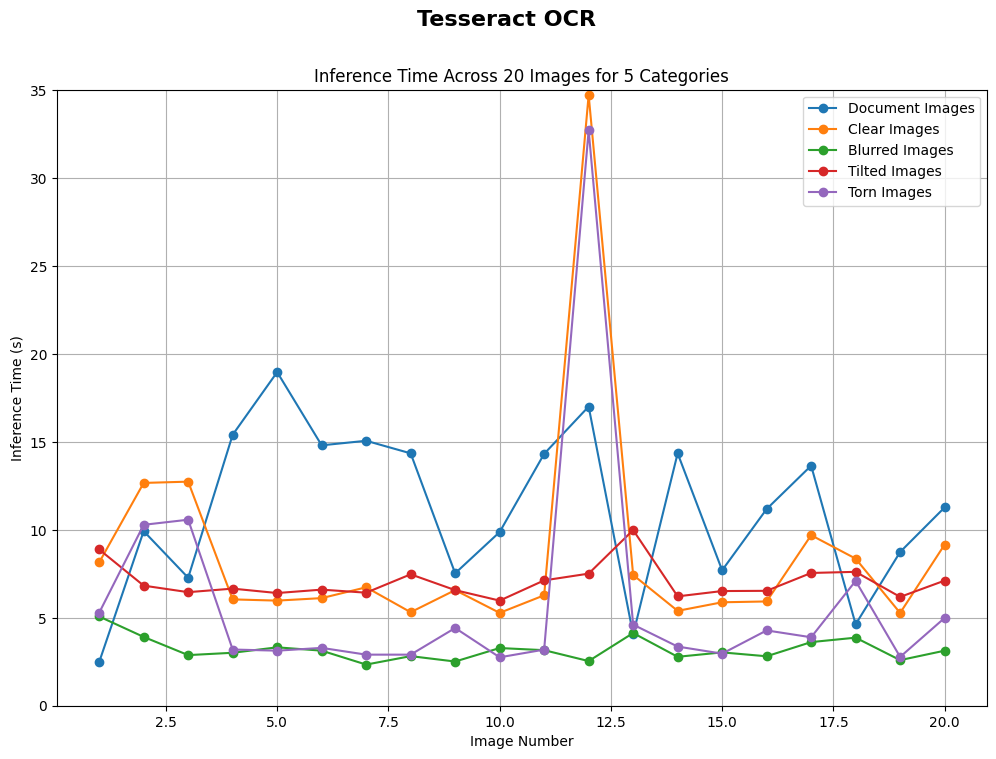

In [30]:
import matplotlib.pyplot as plt

# Assuming each dataframe has 20 rows
x_values = range(1, 21)

# Plot each line for the different categories
plt.figure(figsize=(12, 8))
plt.plot(x_values, df_documents['Inference Time (s)'], label='Document Images', marker='o')
plt.plot(x_values, df_clear_images['Inference Time (s)'], label='Clear Images', marker='o')
plt.plot(x_values, df_blurred_images['Inference Time (s)'], label='Blurred Images', marker='o')
plt.plot(x_values, df_tilted_images['Inference Time (s)'], label='Tilted Images', marker='o')
plt.plot(x_values, df_torn_images['Inference Time (s)'], label='Torn Images', marker='o')

# Set the y-axis limit
plt.ylim(0, 35)

# Add title and labels
plt.suptitle('Tesseract OCR', fontsize=16, fontweight='bold')
plt.title('Inference Time Across 20 Images for 5 Categories')
plt.xlabel('Image Number')
plt.ylabel('Inference Time (s)')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)

# Save the plot
plt.savefig('/kaggle/working/tesseract_inference_time_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Output Visualization

The following images are for the paper. 
1. 1 (10) - Clear Image
2. 1 (17) - Blurred Image
3. 1 (21) - Tilted Image
4. Aguner_Chamak_Page-07-Page-29_Page01 - Document Image

Import Dependencies

In [11]:
import os
from PIL import Image
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

In [12]:
## From the error messaage, we can see that pytesessaract is installed in the directory called '/usr/share/tesseract-ocr'
# it is trying to search for the language file in the following directory
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

## we need to add the bengali.tranerdata in this directory

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata']


In [13]:
## this block of code is taken from (https://realpython.com/working-with-files-in-python/) tutorial

import shutil
src = '/kaggle/input/ocr-bangla/OCR_Bangla/Bengali.traineddata/Bengali.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames) # check that the file is added in this directory which was not present before.

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata', 'Bengali.traineddata']


Initialize file paths

In [14]:
# Paths to the images
CI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Test Images/1 (17).jpg"
BI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Blurred Images/Test Images/1 (10).jpg"
TI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Tilted Images/Test Images/1 (21).jpg"
DI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Document Images/Test Images/Aguner_Chamak_Page07_to_Page29_Page_01.jpg"

Draw boxes

['', '', '', '', ' ', '', '', '', 'মি', 'অনেকদিন', 'ধরে', 'খেয়াল', 'করে', 'দেখছি', 'যে', 'বাড়ির', 'সকলে', 'আমাকে', '', 'কিছু', 'দেবার', 'সময়', 'এক', 'চোখোমি', 'করে।', 'বাবা,', 'মা,', 'দাদীমা,', 'ফুপু,', '', 'নোটন', 'ভাইয়া,', 'ঝোটন', 'ভাইয়া', 'সবাই।', 'এমনকি', 'বাড়ির', 'কামলা', 'জয়তুনের', 'মা', '', 'পযন্ত', '।', '', 'এ', 'অবিচার', 'আজ', 'থেকে', 'না', 'অবশ্য।', '.', '', 'আমার', 'ছোটবেলা', 'থেকে', 'এইরকম', 'চলছে।', '', 'অথচ', 'সবাই', 'জানে', 'আমার', 'কত', 'বুদ্ধি', '!', 'ইসকুলে', 'যাই', 'নে', 'ঠিকমত,', 'ইসকুল', '', 'আমার', 'ভাল', 'লাগে', 'না,', 'তবু', 'ক্লাসে', 'অঙ্কে', 'একশ’', 'র', 'মধ্যে', 'একশ’', 'কেবল', 'আমিই', '', 'পাই।', '', 'মা', 'আমার', 'চেয়ে', 'নোটন', 'ভাইয়া', 'ঝোটন', 'ভাইয়াকে', 'বেশি', 'আদর', 'করে,', 'থেতে', '', 'দেবার', 'সময়', 'ওদের', 'বেশি', 'বেশি', 'করে', 'দেয়', ';', 'বাবা', 'পয়সাঁ', 'দেবার', 'সময়', 'নোটন-', '', 'ঝোটন', 'ভাইয়াকে', 'দেয়', 'পঞ্চাশ', 'পয়সা,', 'আর', 'আমাকে', 'মাত্তর', 'পচিশ,', 'তবু', 'ওরা', '', 'অঙ্কে', 'আমার', 'চেয়ে', 'কত', 'কম', 'পায়।', '', '

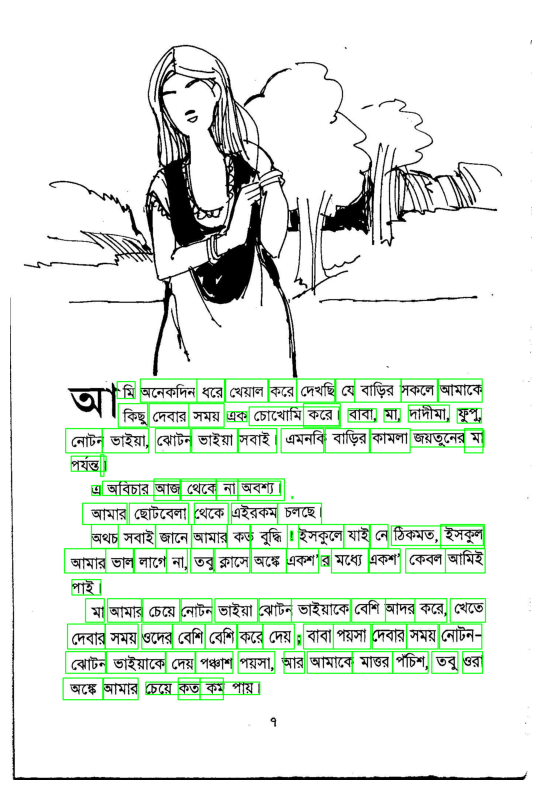

In [21]:
image_path = DI

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = pytesseract.image_to_data(image_rgb, output_type=Output.DICT,lang = 'Bengali')
print(results['text'])

for i in range(len(results['text'])):
    x = results['left'][i]
    y = results['top'][i]
    w = results['width'][i]
    h = results['height'][i]
    
    # Draw a bounding box if the detected text is not empty
    if results['text'][i].strip() != "":
        cv2.rectangle(image_rgb, (x,y), (x+w,y+h), (0, 255, 0), 2)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10,10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


Write image to output directory:

In [19]:
output_image_path = "/kaggle/working/DI_pyT_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

True

['', '', '', '', '']


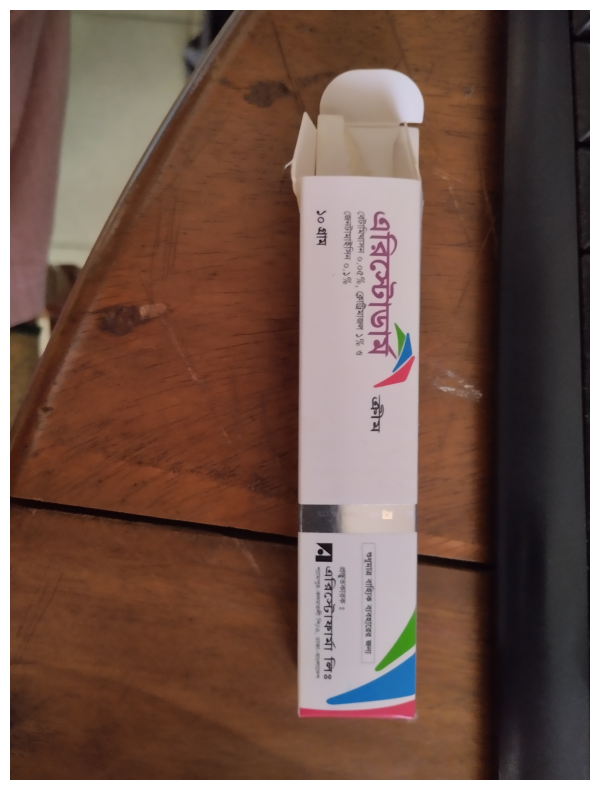

True

In [22]:
image_path = CI

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = pytesseract.image_to_data(image_rgb, output_type=Output.DICT,lang = 'Bengali')
print(results['text'])

for i in range(len(results['text'])):
    x = results['left'][i]
    y = results['top'][i]
    w = results['width'][i]
    h = results['height'][i]
    
    # Draw a bounding box if the detected text is not empty
    if results['text'][i].strip() != "":
        cv2.rectangle(image_rgb, (x,y), (x+w,y+h), (0, 255, 0), 2)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10,10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# Save image to output directory
output_image_path = "/kaggle/working/CI_pyT_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


['', '', '', '', '   ', ' ', '', '    ', '   ', '', '', '', '#', '', '', '', 'Eu', '=', 'EEE', 'EEE', '', '', '', 'ES:', '', '৷', '', '', '', 'f', '', 'i', '', '|']


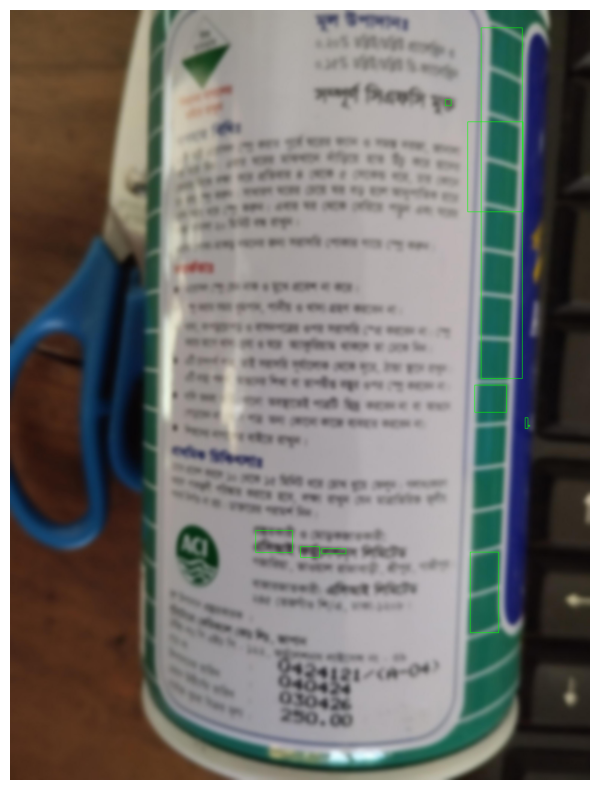

True

In [23]:
image_path = BI

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = pytesseract.image_to_data(image_rgb, output_type=Output.DICT,lang = 'Bengali')
print(results['text'])

for i in range(len(results['text'])):
    x = results['left'][i]
    y = results['top'][i]
    w = results['width'][i]
    h = results['height'][i]
    
    # Draw a bounding box if the detected text is not empty
    if results['text'][i].strip() != "":
        cv2.rectangle(image_rgb, (x,y), (x+w,y+h), (0, 255, 0), 2)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10,10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# Save image to output directory
output_image_path = "/kaggle/working/BI_pyT_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


['', '', '', '', '']


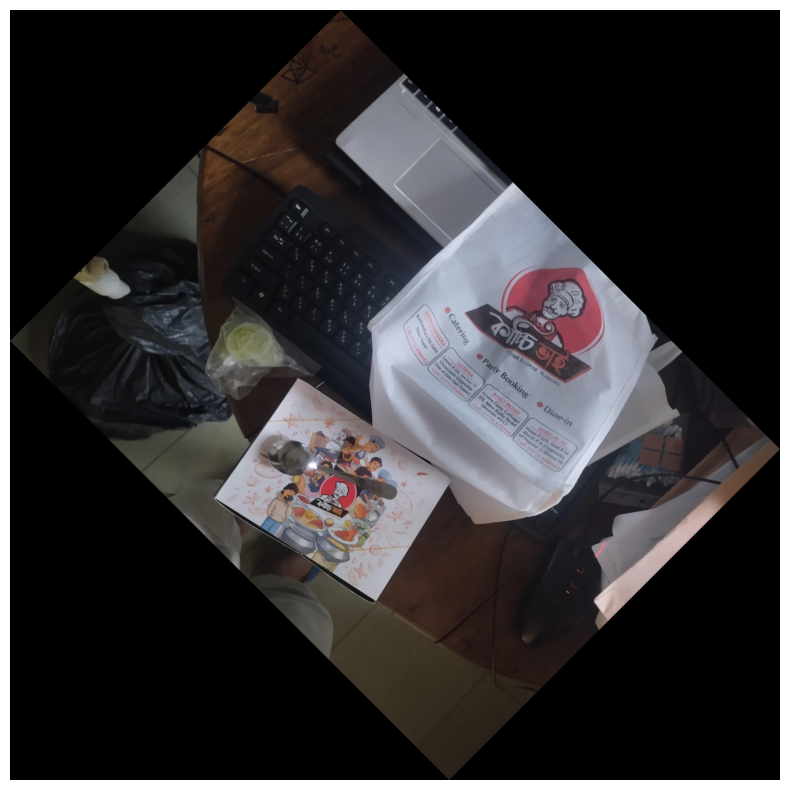

True

In [24]:
image_path = TI

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = pytesseract.image_to_data(image_rgb, output_type=Output.DICT,lang = 'Bengali')
print(results['text'])

for i in range(len(results['text'])):
    x = results['left'][i]
    y = results['top'][i]
    w = results['width'][i]
    h = results['height'][i]
    
    # Draw a bounding box if the detected text is not empty
    if results['text'][i].strip() != "":
        cv2.rectangle(image_rgb, (x,y), (x+w,y+h), (0, 255, 0), 2)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10,10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# Save image to output directory
output_image_path = "/kaggle/working/TI_pyT_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
